<center><h1>Shah_Unnati_HW2</h1></center>
<br>
<br>

Name: Unnati Bhaven Shah
<br>
Github Username: unnatibshah
<br>
USC ID: 4512915005


## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
import random
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics.pairwise import euclidean_distances

Get the Cycle Power Plant Data Set

In [2]:
COLUMN_NAMES = ["AT", "V", "AP", "RH", "PE"]
PATH = '../data/CCPP/Folds5x2_pp.xlsx'

# Reading data from Excel and creating a DataFrame
df = pd.read_excel(PATH, names=COLUMN_NAMES)

# Display the DataFrame
df


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


### (b) Exploring the data

#### i. rows and columns

In [3]:
# Number of rows and columns
num_rows, num_columns = df.shape
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

Number of Rows: 9568
Number of Columns: 5


#### ii. pairwise scatterplots of all the varianbles

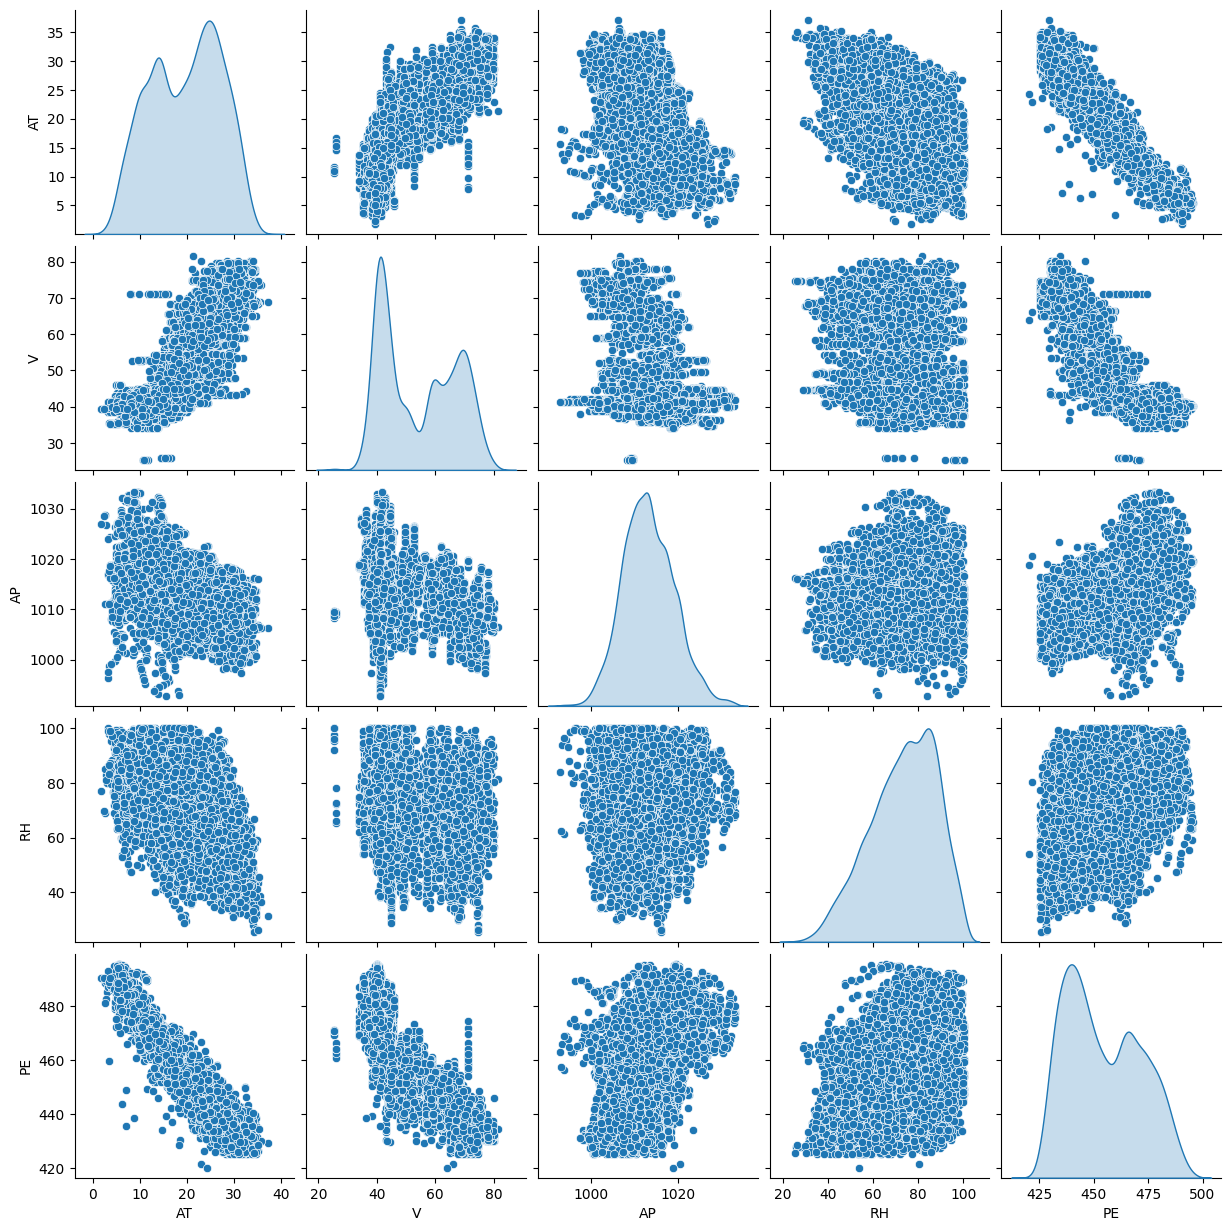

In [4]:
# Pairwise scatterplots
sns.pairplot(data=df, diag_kind="kde")
plt.show()

In terms of the correlation of the dataset -
    AT is positively correlated with V, 
    AT is negatively correlated with PE, 
    V is negatively correlated with PE



#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [5]:
# Summary statistics
summary = {
    "Variable": df.columns,
    "Mean": [round(np.mean(df[col]), 2) for col in df.columns],
    "Median": [round(np.median(df[col]), 2) for col in df.columns],
    "Range": [round(np.max(df[col]) - np.min(df[col]), 2) for col in df.columns],
    "First Quartile": [round(np.quantile(df[col], 0.25), 2) for col in df.columns],
    "Third Quartile": [round(np.quantile(df[col], 0.75), 2) for col in df.columns],
    "Interquartile Range": [round(np.quantile(df[col], 0.75) - np.quantile(df[col], 0.25), 2) for col in df.columns]
}

# Create a DataFrame from the summary dictionary
summary_df = pd.DataFrame(summary)

summary_df

,Variable,Mean,Median,Range,First Quartile,Third Quartile,Interquartile Range
0,AT,19.65,20.34,35.30,13.51,25.72,12.21
1,V,54.31,52.08,56.20,41.74,66.54,24.80
2,AP,1013.26,1012.94,40.41,1009.10,1017.26,8.16
3,RH,73.31,74.97,74.60,63.33,84.83,21.50
4,PE,454.37,451.55,75.50,439.75,468.43,28.68


### (c) Simple Linear Regression

Predictor: V
Regression Coefficient (Slope): -1.1681
Intercept: 517.8015
R-squared: 0.7565
p-value: 0.0000
Number of outliers: 33



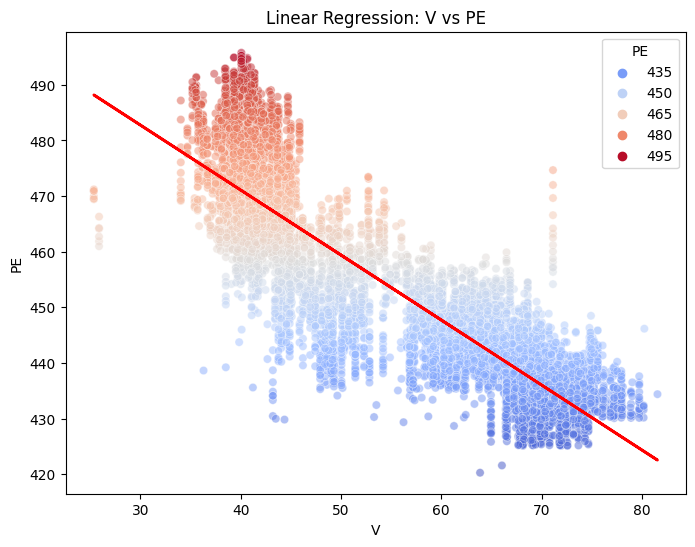

In [6]:

# Fit a simple linear regression model for V
X = df["V"].values.reshape(-1, 1)  # Predictor variable V
y = df["PE"].values.reshape(-1, 1)  # Response variable PE

model = LinearRegression().fit(X, y)

# Calculate the regression coefficients and intercept
coef = model.coef_[0][0]
intercept = model.intercept_[0]

# Calculate R-squared value
r_squared = model.score(X, y)

# Check for statistical significance using a t-test
slope, intercept, r_value, p_value, std_err = stats.linregress(df["V"], df["PE"])

# Create a scatterplot and regression line with different colors
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="V", y="PE", hue="PE", palette="coolwarm", alpha=0.5)
plt.plot(df["V"], coef * df["V"] + intercept, color="red", linewidth=2)
plt.title("Linear Regression: V vs PE")
plt.xlabel("V")
plt.ylabel("PE")

# Print results
print("Predictor: V")
print(f"Regression Coefficient (Slope): {coef:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"p-value: {p_value:.4f}")

# Check for outliers
residuals = y - model.predict(X)
z_scores = np.abs(stats.zscore(residuals))
outliers = z_scores > 3
num_outliers = np.sum(outliers)
print(f"Number of outliers: {num_outliers}\n")

plt.show()


Predictor: AT
Regression Coefficient (Slope): -2.1713
Intercept: 497.0341
R-squared: 0.8989
p-value: 0.0000
Number of outliers: 42



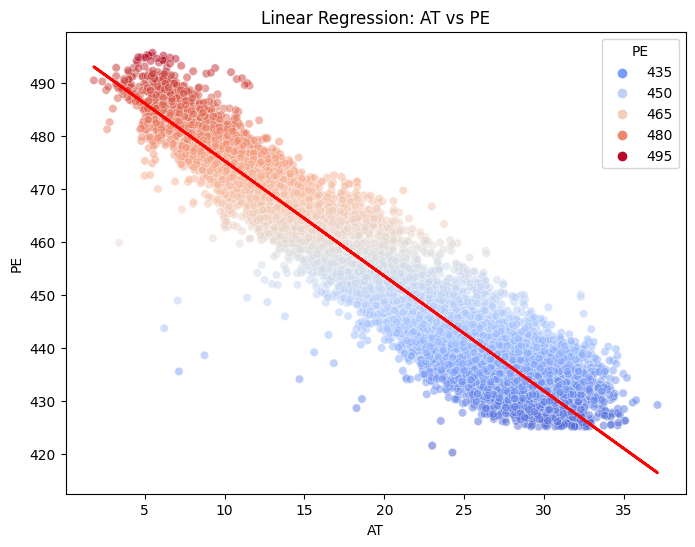

In [7]:


# Fit a simple linear regression model for AT
X = df["AT"].values.reshape(-1, 1)  # Predictor variable AT
y = df["PE"].values.reshape(-1, 1)  # Response variable PE

model = LinearRegression().fit(X, y)

# Calculate the regression coefficients and intercept
coef = model.coef_[0][0]
intercept = model.intercept_[0]

# Calculate R-squared value
r_squared = model.score(X, y)

# Check for statistical significance using a t-test
slope, intercept, r_value, p_value, std_err = stats.linregress(df["AT"], df["PE"])

# Create a scatterplot and regression line with different colors
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="AT", y="PE", hue="PE", palette="coolwarm", alpha=0.5)
plt.plot(df["AT"], coef * df["AT"] + intercept, color="red", linewidth=2)
plt.title("Linear Regression: AT vs PE")
plt.xlabel("AT")
plt.ylabel("PE")

# Print results
print("Predictor: AT")
print(f"Regression Coefficient (Slope): {coef:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"p-value: {p_value:.4f}")

# Check for outliers
residuals = y - model.predict(X)
z_scores = np.abs(stats.zscore(residuals))
outliers = z_scores > 3
num_outliers = np.sum(outliers)
print(f"Number of outliers: {num_outliers}\n")

plt.show()


Predictor: AP
Regression Coefficient (Slope): 1.4899
Intercept: -1055.2610
R-squared: 0.2688
p-value: 0.0000
Number of outliers: 28



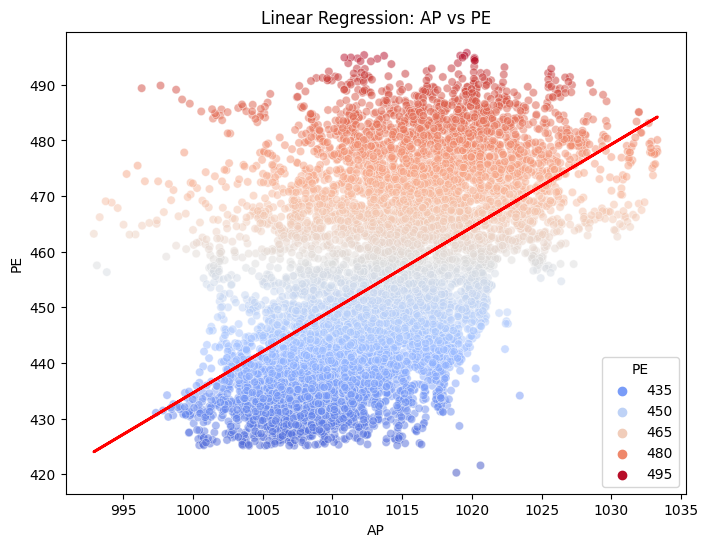

In [8]:


# Fit a simple linear regression model for AP
X = df["AP"].values.reshape(-1, 1)  # Predictor variable AP
y = df["PE"].values.reshape(-1, 1)  # Response variable PE

model = LinearRegression().fit(X, y)

# Calculate the regression coefficients and intercept
coef = model.coef_[0][0]
intercept = model.intercept_[0]

# Calculate R-squared value
r_squared = model.score(X, y)

# Check for statistical significance using a t-test
slope, intercept, r_value, p_value, std_err = stats.linregress(df["AP"], df["PE"])

# Create a scatterplot and regression line with different colors
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="AP", y="PE", hue="PE", palette="coolwarm", alpha=0.5)
plt.plot(df["AP"], coef * df["AP"] + intercept, color="red", linewidth=2)
plt.title("Linear Regression: AP vs PE")
plt.xlabel("AP")
plt.ylabel("PE")

# Print results
print("Predictor: AP")
print(f"Regression Coefficient (Slope): {coef:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"p-value: {p_value:.4f}")

# Check for outliers
residuals = y - model.predict(X)
z_scores = np.abs(stats.zscore(residuals))
outliers = z_scores > 3
num_outliers = np.sum(outliers)
print(f"Number of outliers: {num_outliers}\n")

plt.show()


Predictor: RH
Regression Coefficient (Slope): 0.4557
Intercept: 420.9618
R-squared: 0.1519
p-value: 0.0000
Number of outliers: 2



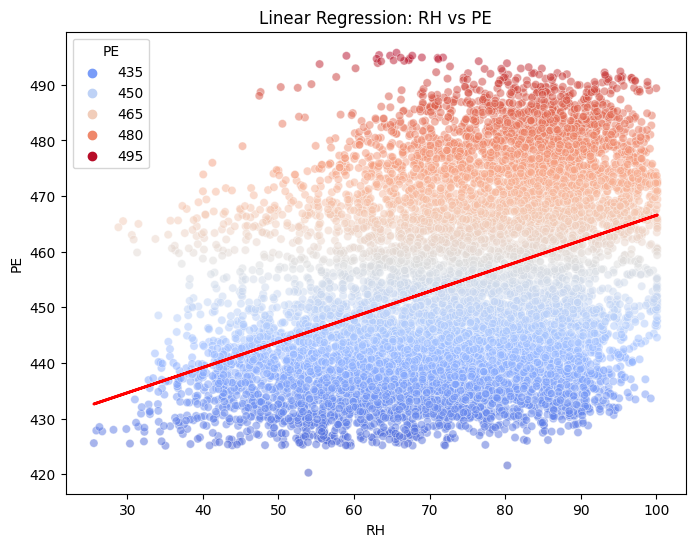

In [9]:

# Fit a simple linear regression model for RH
X = df["RH"].values.reshape(-1, 1)  # Predictor variable RH
y = df["PE"].values.reshape(-1, 1)  # Response variable PE

model = LinearRegression().fit(X, y)

# Calculate the regression coefficients and intercept
coef = model.coef_[0][0]
intercept = model.intercept_[0]

# Calculate R-squared value
r_squared = model.score(X, y)

# Check for statistical significance using a t-test
slope, intercept, r_value, p_value, std_err = stats.linregress(df["RH"], df["PE"])

# Create a scatterplot and regression line with different colors
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="RH", y="PE", hue="PE", palette="coolwarm", alpha=0.5)
plt.plot(df["RH"], coef * df["RH"] + intercept, color="red", linewidth=2)
plt.title("Linear Regression: RH vs PE")
plt.xlabel("RH")
plt.ylabel("PE")

# Print results
print("Predictor: RH")
print(f"Regression Coefficient (Slope): {coef:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"p-value: {p_value:.4f}")

# Check for outliers
residuals = y - model.predict(X)
z_scores = np.abs(stats.zscore(residuals))
outliers = z_scores > 3
num_outliers = np.sum(outliers)
print(f"Number of outliers: {num_outliers}\n")

plt.show()


### (d) Multiple Regression

In [10]:
# Define predictors and response variable
X = df[COLUMN_NAMES[:-1]]  # All predictors (excluding the last column "PE")
y = df["PE"]  # Response variable

# Add a constant term (intercept) to the predictors
X = sm.add_constant(X)

# Fit a multiple regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:08:33   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

The null hypothesis can be rejected for all the predictors since for all of them, the p-value is 0

### (e) 1c Compare to 1d

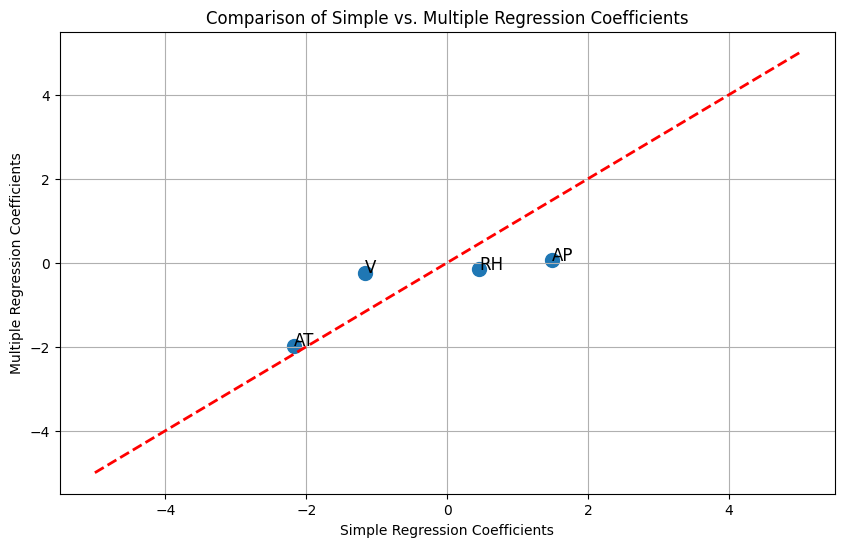

In [11]:
# Initialize lists to store coefficients
simple_regression_coefs = []
multiple_regression_coefs = []

# Loop through each predictor
for predictor in COLUMN_NAMES[:-1]:  # Exclude the last column "PE"
    # Fit a simple linear regression model for the current predictor
    X_simple = df[predictor].values.reshape(-1, 1)  # Predictor variable
    X_simple = sm.add_constant(X_simple)
    model_simple = sm.OLS(y, X_simple).fit()
    
    # Store the coefficients from the simple regression model
    simple_regression_coefs.append(model_simple.params[1])
    
    # Store the coefficients from the multiple regression model
    multiple_regression_coefs.append(model.params[predictor])

# Create a scatterplot to compare coefficients
plt.figure(figsize=(10, 6))
plt.scatter(simple_regression_coefs, multiple_regression_coefs, marker='o', s=100)
plt.title("Comparison of Simple vs. Multiple Regression Coefficients")
plt.xlabel("Simple Regression Coefficients")
plt.ylabel("Multiple Regression Coefficients")

# Annotate points with predictor names
for i, predictor in enumerate(COLUMN_NAMES[:-1]):
    plt.annotate(predictor, (simple_regression_coefs[i], multiple_regression_coefs[i]), fontsize=12)

# Add a reference line for equality
plt.plot([-5, 5], [-5, 5], color='red', linestyle='--', linewidth=2)

plt.grid()
plt.show()

### (f) Nonlinear Association

In [12]:



# Function to identify nonlinear association for a given feature
def identify_non_linear_association(feature_name, degree=3):
    poly = PolynomialFeatures(degree)
    trainingX_poly = poly.fit_transform(df[feature_name].to_numpy().reshape(-1, 1))
    model = sm.OLS(y.to_numpy(), trainingX_poly).fit()
    print(f"\n\nFor feature: {feature_name}")
    print(model.summary())



In [13]:
# Call the function for each predictor
identify_non_linear_association("AT")




For feature: AT
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:08:33   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673  

The p-values are samll enough to reject the Null Hypothesis. That implies an evidence between those nonlinear association of predictor and respose.

In [14]:
identify_non_linear_association("V")




For feature: V
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:08:34   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151   

The p-value for x^2 and x^3 is not negligible and for x^2 especially, it is of significant amount. Hence, we cannot reject the null hypothesis and hence there is no non-linear association between the predictors and the response.

In [15]:
identify_non_linear_association("AP")




For feature: AP
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:08:34   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009  

The p-values are samll enough to reject the Null Hypothesis. That implies an evidence between those nonlinear association of predictor and respose.

In [16]:
identify_non_linear_association("RH")



For feature: RH
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:08:34   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545  

The p-values are samll enough to reject the Null Hypothesis. That implies an evidence between those nonlinear association of predictor and respose.

### (g) Interactions of Predictors

In [17]:

# Define the response variable
response_variable = "PE"

# Define the formula for all pairwise interaction terms
interaction_terms = f"{response_variable} ~ AT + V + AP + RH + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH"

# Fit a linear regression model with interaction terms
model = smf.ols(formula=interaction_terms, data=df).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:08:34   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

 Statistical Significance:
- It can be seen that $V$, $(AT:V)$, $(AT:RH)$ and $(V:AP)$ are statistically significant with their p-values are significantly smaller than 0.05. 

 - If we set a p-value thresh of 0.05, $AP$, $RH$ and $(AP:RH)$ can be considered as statistically significant as well. 

- If we set a p-value thresh of 0.10, $AT$ and $(V:RH)$ can be considered as statistically significant as well. 

- For $AT:AP$, however, it has an extremely large p-value. That implies it can never be statistically significant. 

### (h) Improvement

In [18]:


# Generate indices in random order to shuffle data
idx = [x for x in range(0, len(df))]
random.seed(9568)
random.shuffle(idx)

# Split the dataset: 70% train, 30% test
train_size = round(len(df) * 0.7)
train_data_70 = df.iloc[idx[:train_size], :]
test_data_30 = df.iloc[idx[train_size:], :]

# Declare a dict to record MSE for different models
mse_dict = {}

# Model with all predictors
formula = 'PE ~ AT + V + AP + RH'
olsres = smf.ols(formula, train_data_70).fit()

predict_trainY = olsres.predict(train_data_70.iloc[:, :-1])
predict_testY = olsres.predict(test_data_30.iloc[:, :-1])

train_mse = mean_squared_error(train_data_70['PE'], predict_trainY)
test_mse = mean_squared_error(test_data_30['PE'], predict_testY)

mse_dict["all_predictor_LR"] = [train_mse, test_mse]

print("\nFor formula: \n {} \nwe have train MSE of {} and test MSE of {}".format(formula, np.around(train_mse, 2), np.around(test_mse, 2)))

# Model with all predictors, interactions, and quadratic terms
formula = 'PE ~ AT + V + AP + RH + np.power(AT,2) + np.power(V,2) + np.power(AP,2) + np.power(RH,2) + AT:V + AT:AP + AT:RH + V:AP + V:RH + AP:RH'
olsres = smf.ols(formula, train_data_70).fit()

predict_trainY = olsres.predict(train_data_70.iloc[:, :-1])
predict_testY = olsres.predict(test_data_30.iloc[:, :-1])

train_mse = mean_squared_error(train_data_70['PE'], predict_trainY)
test_mse = mean_squared_error(test_data_30['PE'], predict_testY)

mse_dict["all_inter_LR"] = [train_mse, test_mse]

print("\nFor formula: \n {} \nwe have train MSE of {} and test MSE of {}".format(formula, np.around(train_mse, 2), np.around(test_mse, 2)))

# Define a backward selection process for the improved model
def backwardSelection(train_data, formula, p_thresh):
    import re
    while True:
        olsres = smf.ols(formula, train_data).fit()
        response = re.split(" ~ ", formula)[0]
        # Observe the p-values excluding the intercept
        p_values = olsres.pvalues[1:]
        max_p = p_values.max()
        if (max_p >= p_thresh):
            print("Remove " + p_values[p_values == max_p].axes[0].tolist()[0])
            new_terms = p_values[p_values != max_p].axes[0].tolist()
            formula = response + " ~ " + " + ".join(new_terms)
        else:
            return olsres, formula

# Model after backward selection
formula = 'PE ~ AT + V + AP + RH + np.power(AT,2) + np.power(V,2) + np.power(AP,2) + np.power(RH,2) + AT:V + AT:RH + AP:RH'
olsres, tailed_formula = backwardSelection(train_data_70, formula, 0.05)

predict_trainY = olsres.predict(train_data_70.iloc[:, :-1])
predict_testY = olsres.predict(test_data_30.iloc[:, :-1])

train_mse = mean_squared_error(train_data_70['PE'], predict_trainY)
test_mse = mean_squared_error(test_data_30['PE'], predict_testY)

mse_dict["improved_LR"] = [train_mse, test_mse]

print("\nFor formula: \n {} \nwe have train MSE of {} and test MSE of {}".format(tailed_formula, np.around(train_mse, 2), np.around(test_mse, 2)))

# Create a DataFrame from the mse_dict
mse_summary = pd.DataFrame.from_dict(mse_dict, orient="index", columns=["Train MSE", "Test MSE"])

# Display the MSE summary
print(mse_summary)



For formula: 
 PE ~ AT + V + AP + RH 
we have train MSE of 20.52 and test MSE of 21.36

For formula: 
 PE ~ AT + V + AP + RH + np.power(AT,2) + np.power(V,2) + np.power(AP,2) + np.power(RH,2) + AT:V + AT:AP + AT:RH + V:AP + V:RH + AP:RH 
we have train MSE of 17.87 and test MSE of 18.68
Remove np.power(V, 2)

For formula: 
 PE ~ AT + V + AP + RH + np.power(AT, 2) + np.power(AP, 2) + np.power(RH, 2) + AT:V + AT:RH + AP:RH 
we have train MSE of 17.93 and test MSE of 18.66
                  Train MSE   Test MSE
all_predictor_LR  20.518696  21.357070
all_inter_LR      17.871294  18.677607
improved_LR       17.926440  18.659647


Compare the all-predictor model and the one with nonlinear terms, we can see a significant imporvement in test MSE from 21.357070 to 18.677607.

### (i) KNN

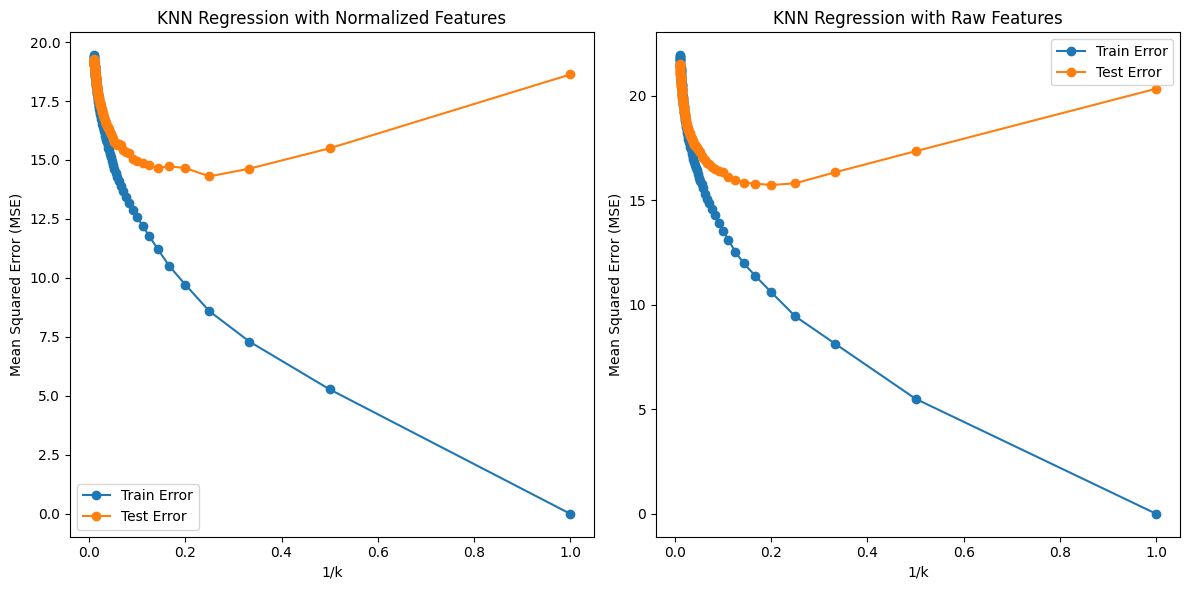

Best k for Normalized Features: 4
Corresponding Test MSE for Normalized Features: 14.305669422675024

Best k for Raw Features: 5
Corresponding Test MSE for Raw Features: 15.726819842563568


In [19]:


# Define the response variable
y = df["PE"]

# Define predictors (excluding "PE")
X = df[COLUMN_NAMES[:-1]]

# Split the dataset into training (70%) and testing (30%) subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize lists to store train and test errors
train_errors_normalized = []
test_errors_normalized = []
train_errors_raw = []
test_errors_raw = []

# Loop through values of k from 1 to 100
k_values = range(1, 101)
for k in k_values:
    # Create and fit the KNN regression model with normalized features
    scaler = StandardScaler()
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)
    
    knn_model_normalized = KNeighborsRegressor(n_neighbors=k)
    knn_model_normalized.fit(X_train_normalized, y_train)
    
    # Predict on training and testing data with normalized features
    y_train_pred_normalized = knn_model_normalized.predict(X_train_normalized)
    y_test_pred_normalized = knn_model_normalized.predict(X_test_normalized)
    
    # Calculate MSE for training and testing data with normalized features
    train_error_normalized = mean_squared_error(y_train, y_train_pred_normalized)
    test_error_normalized = mean_squared_error(y_test, y_test_pred_normalized)
    
    # Append errors to the lists for normalized features
    train_errors_normalized.append(train_error_normalized)
    test_errors_normalized.append(test_error_normalized)
    
    # Create and fit the KNN regression model with raw features
    knn_model_raw = KNeighborsRegressor(n_neighbors=k)
    knn_model_raw.fit(X_train, y_train)
    
    # Predict on training and testing data with raw features
    y_train_pred_raw = knn_model_raw.predict(X_train)
    y_test_pred_raw = knn_model_raw.predict(X_test)
    
    # Calculate MSE for training and testing data with raw features
    train_error_raw = mean_squared_error(y_train, y_train_pred_raw)
    test_error_raw = mean_squared_error(y_test, y_test_pred_raw)
    
    # Append errors to the lists for raw features
    train_errors_raw.append(train_error_raw)
    test_errors_raw.append(test_error_raw)

# Plot the train and test errors in terms of 1/k for both normalized and raw features
plt.figure(figsize=(12, 6))

# Plot for normalized features
plt.subplot(1, 2, 1)
plt.plot(1 / np.array(k_values), train_errors_normalized, label="Train Error", marker='o')
plt.plot(1 / np.array(k_values), test_errors_normalized, label="Test Error", marker='o')
plt.title("KNN Regression with Normalized Features")
plt.xlabel("1/k")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()

# Plot for raw features
plt.subplot(1, 2, 2)
plt.plot(1 / np.array(k_values), train_errors_raw, label="Train Error", marker='o')
plt.plot(1 / np.array(k_values), test_errors_raw, label="Test Error", marker='o')
plt.title("KNN Regression with Raw Features")
plt.xlabel("1/k")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()

plt.tight_layout()
plt.show()

# Determine the best k for normalized features
best_k_normalized = k_values[np.argmin(test_errors_normalized)]

# Determine the best k for raw features
best_k_raw = k_values[np.argmin(test_errors_raw)]

# Print the best k values and corresponding test errors
print("Best k for Normalized Features:", best_k_normalized)
print("Corresponding Test MSE for Normalized Features:", test_errors_normalized[best_k_normalized - 1])
print("\nBest k for Raw Features:", best_k_raw)
print("Corresponding Test MSE for Raw Features:", test_errors_raw[best_k_raw - 1])


In [20]:
# Calculate the train and test MSE for the best k values
best_k_train_error_normalized = train_errors_normalized[best_k_normalized - 1]
best_k_test_error_normalized = test_errors_normalized[best_k_normalized - 1]

best_k_train_error_raw = train_errors_raw[best_k_raw - 1]
best_k_test_error_raw = test_errors_raw[best_k_raw - 1]

# Print the train and test MSE for the best k values
print("\nTrain MSE for Best KNN (Normalized):", best_k_train_error_normalized)
print("Test MSE for Best KNN (Normalized):", best_k_test_error_normalized)

print("\nTrain MSE for Best KNN (Raw):", best_k_train_error_raw)
print("Test MSE for Best KNN (Raw):", best_k_test_error_raw)



Train MSE for Best KNN (Normalized): 8.591432839331045
Test MSE for Best KNN (Normalized): 14.305669422675024

Train MSE for Best KNN (Raw): 10.600768887561596
Test MSE for Best KNN (Raw): 15.726819842563568


### (j ) Compare KNN and Linear

In [21]:


# Assuming you have a dictionary called error_summary
error_summary = {
    "all_predictor_LR": [20.518696,  21.357070],
    "all_inter_LR": [17.871294, 18.677607],
    "improved_LR": [17.87625, 18.693091],
    "raw_KNN": [10.600768887561596, 15.726819842563568],
    "normalized_KNN": [8.591432839331045, 14.305669422675024]
}

# Create an empty dictionary to store rounded error summaries
rounded_error_summary = {}

# Iterate through the original error_summary dictionary and round the values
for key, value in error_summary.items():
    rounded_values = [round(elem, 4) for elem in value]
    rounded_error_summary[key] = rounded_values

# Convert the rounded error_summary dictionary to a DataFrame
df_error_summary = pd.DataFrame.from_dict(rounded_error_summary, orient="index", columns=["Train Error", "Test Error"])

# Display the DataFrame
print(df_error_summary)


                  Train Error  Test Error
all_predictor_LR      20.5187     21.3571
all_inter_LR          17.8713     18.6776
improved_LR           17.8762     18.6931
raw_KNN               10.6008     15.7268
normalized_KNN         8.5914     14.3057


In this dataset, KNN regression outperforms linear regression in terms of MSE, as indicated in the table above. The likely reason behind this is that the data is challenging to linearly model. 

## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

When the sample size (n) is exceptionally large and the number of predictors (p) is small, a flexible statistical learning method is generally expected to perform better than an inflexible method. This is because with a large sample size, a flexible method can effectively capture complex relationships in the data, whereas an inflexible method may lead to underfitting.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

Conversely, when the number of predictors (p) is extremely large, and the number of observations (n) is small, an inflexible statistical learning method is typically expected to perform better. In such cases, a flexible method might overfit the data due to the limited number of observations, while an inflexible method is less prone to overfitting.

### (c) The relationship between the predictors and response is highly non-linear.

In situations where the relationship between the predictors and response is highly non-linear, a flexible statistical learning method is generally preferred. This is because flexible methods have the capacity to capture and model non-linear patterns effectively, while inflexible methods may struggle to represent such complex relationships.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

When the variance of the error terms (σ2 = Var(ε)) is exceptionally high, indicating significant noise in the data, an inflexible statistical learning method is often a better choice. High error variance can lead flexible methods to overfit the noise, resulting in poor generalization. Inflexible methods are less influenced by noise and tend to provide more stable predictions.


## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [22]:

# Define the data
obs = [[0, 3, 0, 'Red'],
       [2, 0, 0, 'Red'],
       [0, 1, 3, 'Red'],
       [0, 1, 2, 'Green'],
       [-1, 0, 1, 'Green'],
       [1, 1, 1, 'Red']]

# Create a DataFrame
colordf = pd.DataFrame(obs, index=[1, 2, 3, 4, 5, 6], columns=["X1", "X2", "X3", "Y"])

# Extract the features and labels
trainX = colordf.iloc[:, :-1].to_numpy()
trainY = colordf.iloc[:, -1].to_numpy()

# Define the test point
testX = np.array([[0, 0, 0]])

# Calculate the Euclidean distances
distances = euclidean_distances(trainX, testX)

# Print the distances
for i, distance in enumerate(distances):
    print(f"The Euclidean distance between obs[{i + 1}] and the test point is {distance[0]:.2f}")


The Euclidean distance between obs[1] and the test point is 3.00
The Euclidean distance between obs[2] and the test point is 2.00
The Euclidean distance between obs[3] and the test point is 3.16
The Euclidean distance between obs[4] and the test point is 2.24
The Euclidean distance between obs[5] and the test point is 1.41
The Euclidean distance between obs[6] and the test point is 1.73


### (b) What is our prediction with K = 1? Why?

Choose the nearest one which is observation 5. So effectively, the prediction of Y is green.

### (c) What is our prediction with K = 3? Why?

Choose the nearest 3 i.e., Observation numbers 2 (Red), 5 (Green) and 6 (Red). Since the majority is 3 Green vs 1 Red, we predict that the output is going to be Red

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

As K, the number of nearest neighbors considered in KNN, increases, the model's flexibility decreases, resulting in a more linear decision boundary. Given that the problem's decision boundary is highly non-linear, it is advisable to use a smaller value for K.